In [5]:
#read the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the datasets
applications_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\applications.csv')
branches_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\branches.csv')
customers_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\customers.csv')
defaults_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\defaults.csv')
loans_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\loans.csv')
transactions_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\transactions.csv')

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\587978777.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\applications.csv')


In [3]:
# Inspect the datasets
data_overview = {
    "Applications": applications_df.info(),
    "Branches": branches_df.info(),
    "Customers": customers_df.info(),
    "Defaults": defaults_df.info(),
    "Loans": loans_df.info(),
    "Transactions": transactions_df.info()
}

applications_df.head(), branches_df.head(), customers_df.head(), defaults_df.head(), loans_df.head(), transactions_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Branch_ID                   50 non-null     object
 1   Branch_Name   

(  Application_ID  Loan_ID Customer_ID Application_Date Approval_Date  \
 0        A000001  L000001     C000001       2022-05-11    2020-10-02   
 1        A000002  L000002     C000002       2022-03-18    2022-11-29   
 2        A000003  L000003     C000003       2022-01-17    2023-07-01   
 3        A000004  L000004     C000004       2019-03-09    2024-08-30   
 4        A000005  L000005     C000005       2024-07-18    2020-03-18   
 
       Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
 0         Business          Agent            6427        Approved   
 1        Education         Online            8605        Approved   
 2         Business         Online            1450        Approved   
 3  Home Renovation          Agent            8171        Approved   
 4        Education         Branch            4931        Approved   
 
   Rejection_Reason  
 0              NaN  
 1              NaN  
 2              NaN  
 3              NaN  
 4              NaN  ,
   Br

In [7]:
# Function to inspect missing values and duplicates for a given dataset
def inspect_data(df, name):
    print(f"Dataset: {name}")
    print("Shape:", df.shape)
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicate Rows:", df.duplicated().sum())
    print("\n")

# Inspect all datasets
inspect_data(applications_df, "Applications")
inspect_data(branches_df, "Branches")
inspect_data(customers_df, "Customers")
inspect_data(defaults_df, "Defaults")
inspect_data(loans_df, "Loans")
inspect_data(transactions_df, "Transactions")

Dataset: Applications
Shape: (82600, 10)
Missing Values:
 Application_ID          0
Loan_ID             12600
Customer_ID             0
Application_Date        0
Approval_Date       12600
Loan_Purpose            0
Source_Channel          0
Processing_Fee          0
Approval_Status         0
Rejection_Reason    70000
dtype: int64
Duplicate Rows: 0


Dataset: Branches
Shape: (50, 9)
Missing Values:
 Branch_ID                     0
Branch_Name                   0
Region                        0
Total_Customers               0
Total_Active_Loans            0
Delinquent_Loans              0
Loan_Disbursement_Amount      0
Avg_Processing_Time           0
Relationship_Manager_Count    0
dtype: int64
Duplicate Rows: 0


Dataset: Customers
Shape: (70000, 14)
Missing Values:
 Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status      

In [8]:
# Clean Applications dataset

# Convert date columns to datetime format
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'], errors='coerce')
applications_df['Approval_Date'] = pd.to_datetime(applications_df['Approval_Date'], errors='coerce')

# Handle missing values
# - `Loan_ID` and `Approval_Date`: Likely missing for rejected applications, leave as-is for now
# - `Rejection_Reason`: Replace NaN with "Approved" for approved applications
applications_df['Rejection_Reason'] = applications_df['Rejection_Reason'].fillna("Approved")

# Verify data types and check for remaining issues
applications_cleaned_info = {
    "Missing Values": applications_df.isnull().sum(),
    "Data Types": applications_df.dtypes,
    "Duplicates": applications_df.duplicated().sum()
}

applications_cleaned_info


{'Missing Values': Application_ID          0
 Loan_ID             12600
 Customer_ID             0
 Application_Date        0
 Approval_Date       12600
 Loan_Purpose            0
 Source_Channel          0
 Processing_Fee          0
 Approval_Status         0
 Rejection_Reason        0
 dtype: int64,
 'Data Types': Application_ID              object
 Loan_ID                     object
 Customer_ID                 object
 Application_Date    datetime64[ns]
 Approval_Date       datetime64[ns]
 Loan_Purpose                object
 Source_Channel              object
 Processing_Fee               int64
 Approval_Status             object
 Rejection_Reason            object
 dtype: object,
 'Duplicates': 0}

In [17]:
# Handle missing Loan_ID
applications_df['Loan_ID'] = applications_df.apply(
    lambda row: 'NA' if row['Approval_Status'] == 'Rejected' else row['Loan_ID'],
    axis=1
)

# Handle missing Approval_Date
applications_df['Approval_Date'] = applications_df.apply(
    lambda row: 'NA' if row['Approval_Status'] == 'Rejected' else row['Approval_Date'],
    axis=1
)

# Verify the changes
applications_cleaned_info = {
    "Missing Values": applications_df.isnull().sum(),
    "Unique Loan IDs": applications_df['Loan_ID'].nunique(),
    "Approval Status Counts": applications_df['Approval_Status'].value_counts()
}

print(applications_cleaned_info)

{'Missing Values': Application_ID      0
Loan_ID             0
Customer_ID         0
Application_Date    0
Approval_Date       0
Loan_Purpose        0
Source_Channel      0
Processing_Fee      0
Approval_Status     0
Rejection_Reason    0
dtype: int64, 'Unique Loan IDs': 70001, 'Approval Status Counts': Approval_Status
Approved    70000
Rejected    12600
Name: count, dtype: int64}


2. Descriptive Analysis:

2.1 Distribution Analysis
Objective: Summarize and visualize the distribution of key numerical variables.
Variables: Loan_Amount, EMI_Amount, Credit_Score.

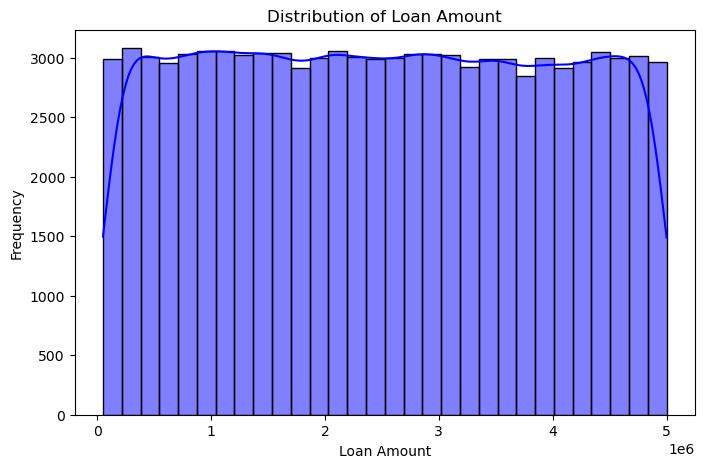

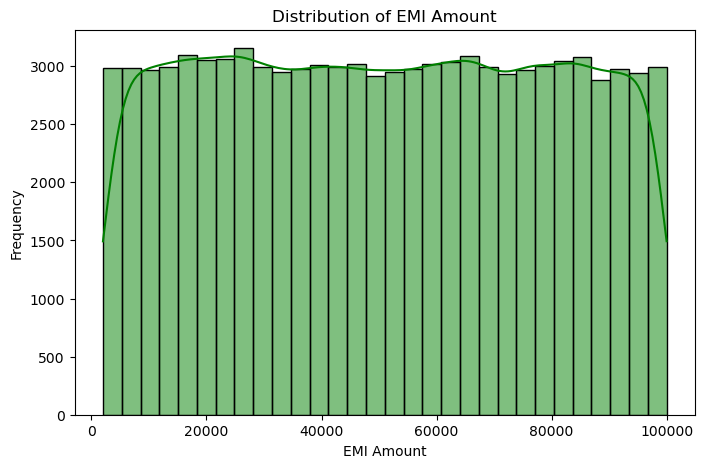

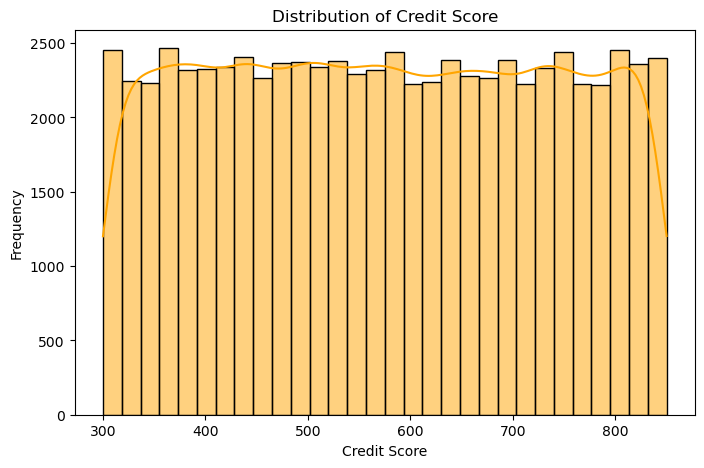

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Loan_Amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(loans_df['Loan_Amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot EMI_Amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(loans_df['EMI_Amount'], kde=True, bins=30, color='green')
plt.title('Distribution of EMI Amount')
plt.xlabel('EMI Amount')
plt.ylabel('Frequency')
plt.show()

# Plot Credit_Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(customers_df['Credit_Score'], kde=True, bins=30, color='orange')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


2.2 Regional Trends
Objective: Analyze loan disbursement and default rates by region.
Dataset: 
Used branches_df for regional loan disbursement
Used defaults_df for defaults merging with customers_df

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\652768903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Blues')


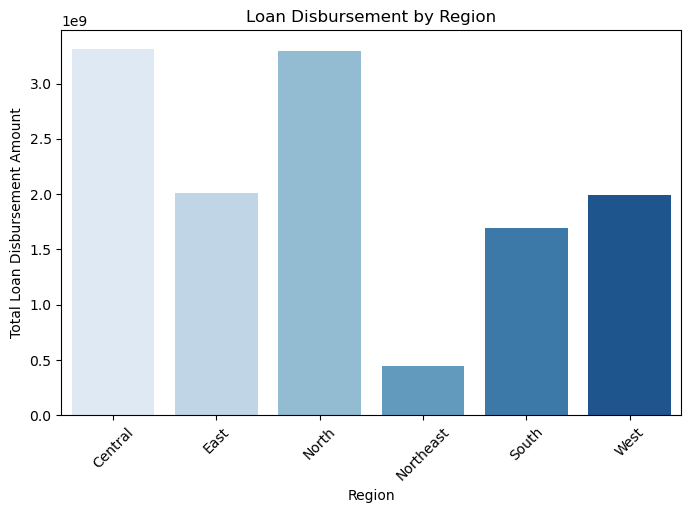

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\652768903.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_defaults, x='Region', y='Default_Amount', palette='Reds')


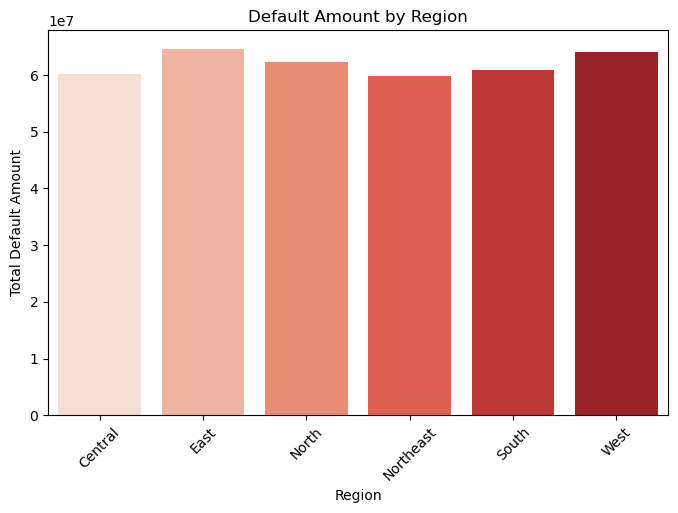

In [71]:
# Loan Disbursement by Region
regional_disbursement = branches_df.groupby('Region')['Loan_Disbursement_Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=regional_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Blues')
plt.title('Loan Disbursement by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Disbursement Amount')
plt.xticks(rotation=45)
plt.show()

# Default Rates by Region
defaults_by_region = defaults_df.merge(customers_df, on='Customer_ID')
regional_defaults = defaults_by_region.groupby('Region')['Default_Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=regional_defaults, x='Region', y='Default_Amount', palette='Reds')
plt.title('Default Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Default Amount')
plt.xticks(rotation=45)
plt.show()


3: Default Risk Analysis

3.1 Correlation Between Loan Attributes and Defaults
Objective: Understand how Loan_Amount, Interest_Rate, and Credit_Score relate to the probability of default.
Data Preparation: Add a binary column (Default_Flag) to indicate whether a loan defaulted (1) or not (0).

Correlation Matrix:
               Loan_Amount  Interest_Rate  Credit_Score  Default_Flag
Loan_Amount       1.000000      -0.002973      0.000417      0.000632
Interest_Rate    -0.002973       1.000000      0.002840      0.002923
Credit_Score      0.000417       0.002840      1.000000      0.001243
Default_Flag      0.000632       0.002923      0.001243      1.000000


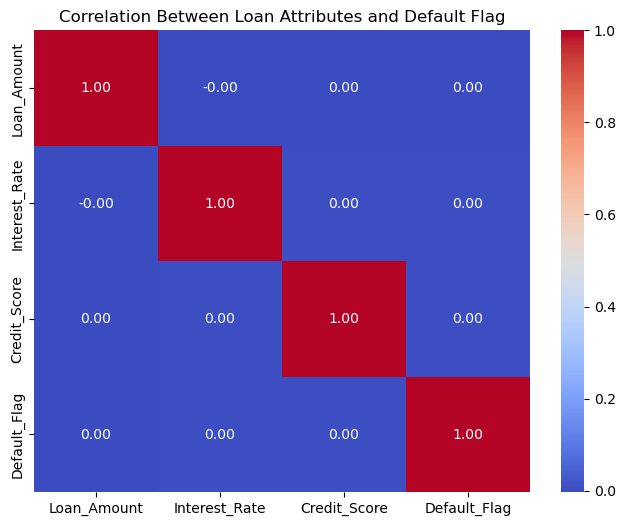

In [59]:
# Merge defaults with loans and customers
loan_defaults = loans_df.merge(defaults_df, on='Customer_ID', how='left')
loan_defaults = loan_defaults.merge(customers_df[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Create Default_Flag: 1 if defaulted, else 0
loan_defaults['Default_Flag'] = loan_defaults['Default_Amount'].notna().astype(int)

# Calculate correlation
correlation_matrix = loan_defaults[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Loan Attributes and Default Flag")
plt.show()


3.2 Pairwise Correlation Analysis
Objective: Visualize pairwise correlations between key variables like EMI_Amount, Overdue_Amount, and Default_Amount.

Pairwise Correlation Matrix:
                EMI_Amount  Overdue_Amount  Default_Amount
EMI_Amount        1.000000       -0.000128        0.007256
Overdue_Amount   -0.000128        1.000000       -0.001174
Default_Amount    0.007256       -0.001174        1.000000


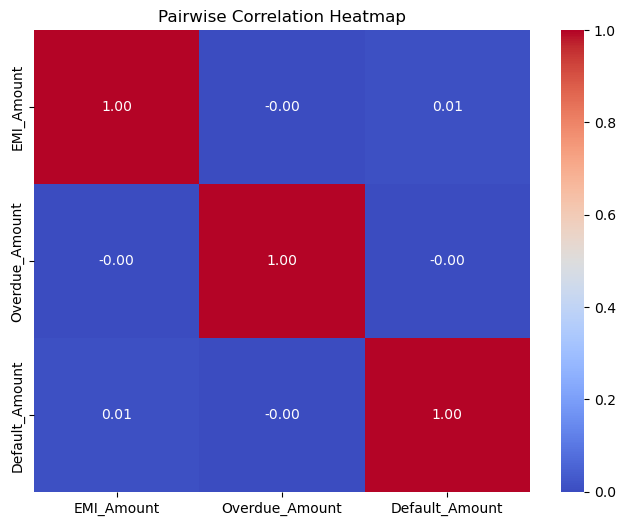

In [61]:
# Subset for pairwise correlation
pairwise_data = loan_defaults[['EMI_Amount', 'Overdue_Amount', 'Default_Amount']]

# Calculate correlation
pairwise_correlation = pairwise_data.corr()

print("Pairwise Correlation Matrix:")
print(pairwise_correlation)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Correlation Heatmap")
plt.show()


3.3 Correlation Between Branch Metrics and Defaults
Objective: Analyze how branch-level metrics like Delinquent_Loans and Loan_Disbursement_Amount relate to default rates.
Note: No matching/common field in branches_df to map with defaults_df

In [ ]:
# Calculate default rate per branch: No matching/common field in branches_df to map with defaults_df

4. Branch and Regional Performance

4.1 Rank Branches by Loan Disbursement Volume
Objective: Identify branches with the highest loan disbursement volumes.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3320443169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_branches, x='Branch_ID', y='Loan_Disbursement_Amount', palette='Blues')


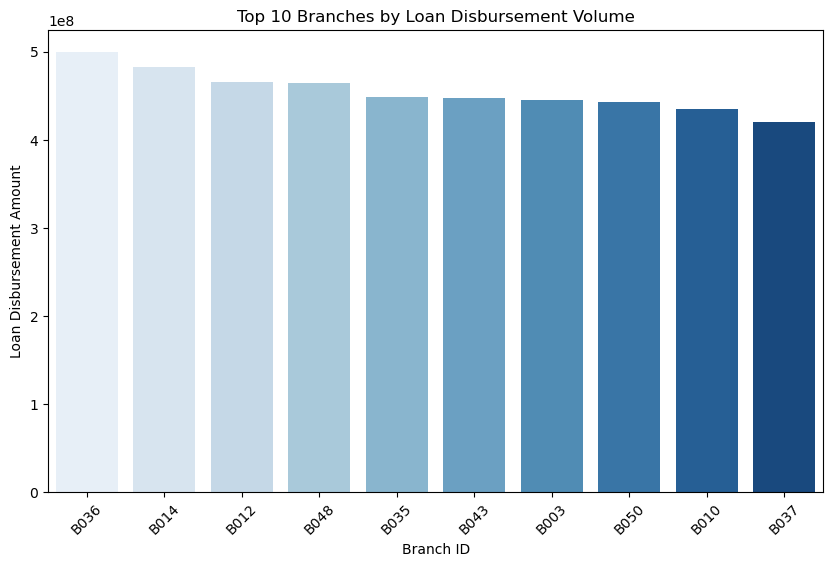

In [80]:
# Aggregate disbursement volume by branch
branch_disbursement = branches_df.groupby('Branch_ID')['Loan_Disbursement_Amount'].sum().reset_index()

# Rank branches by disbursement volume
branch_disbursement['Rank_Disbursement'] = branch_disbursement['Loan_Disbursement_Amount'].rank(ascending=False)

# Visualize top branches
top_branches = branch_disbursement.sort_values(by='Loan_Disbursement_Amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_branches, x='Branch_ID', y='Loan_Disbursement_Amount', palette='Blues')
plt.title('Top 10 Branches by Loan Disbursement Volume')
plt.xlabel('Branch ID')
plt.ylabel('Loan Disbursement Amount')
plt.xticks(rotation=45)
plt.show()


4.2 Rank Branches by Processing Time Efficiency
Objective: Rank branches by the average time taken to process loan applications.
Data Needed: applications_df (use Application_Date and Approval_Date).

In [ ]:
No matching/common field in branches_df

4.3 Rank Branches by Default Rates and Recovery Rates
Objective: Rank branches based on their default rates and recovery performance.

In [ ]:
No matching/common field in branches_df

5. Customer Segmentation

5.1 Segment Customers by Income, Credit Score, and Loan Status
Objective: Group customers based on their income, credit score, and loan repayment behavior.

In [96]:
# Segment customers by Income and Credit Score
customers_df['Income_Segment'] = pd.cut(customers_df['Annual_Income'], 
                                        bins=[0, 500000, 1000000, 1500000, float('inf')], 
                                        labels=['Low', 'Medium', 'High', 'Very High'])

customers_df['Credit_Score_Segment'] = pd.cut(customers_df['Credit_Score'], 
                                              bins=[0, 300, 600, 750, 900], 
                                              labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Merge loan status with customer data
customer_loan_status = loans_df.merge(defaults_df[['Loan_ID']], on='Loan_ID', how='left', indicator=True)
customer_loan_status['Loan_Status'] = customer_loan_status['_merge'].map({'both': 'Defaulted', 'left_only': 'Active'})
customer_segments = customers_df.merge(customer_loan_status[['Customer_ID', 'Loan_Status']], on='Customer_ID')

# Segment counts
segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status']).size().reset_index(name='Count')
segmentation_summary


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\490151958.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status']).size().reset_index(name='Count')


,Income_Segment,Credit_Score_Segment,Loan_Status,Count
0,Low,Poor,Active,23
1,Low,Poor,Defaulted,4
2,Low,Fair,Active,7471
3,Low,Fair,Defaulted,851
4,Low,Good,Active,3582
5,Low,Good,Defaulted,420
6,Low,Excellent,Active,2437
7,Low,Excellent,Defaulted,251
8,Medium,Poor,Active,48
9,Medium,Poor,Defaulted,3


5.2 Identify High-Risk and High-Value Customer Groups
High-Risk: Customers with low credit scores, low income, and default history.
High-Value: Customers with high income, excellent credit scores, and active loans.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3137390374.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_summary, x='Region', y='High_Risk_Count', palette='Reds')


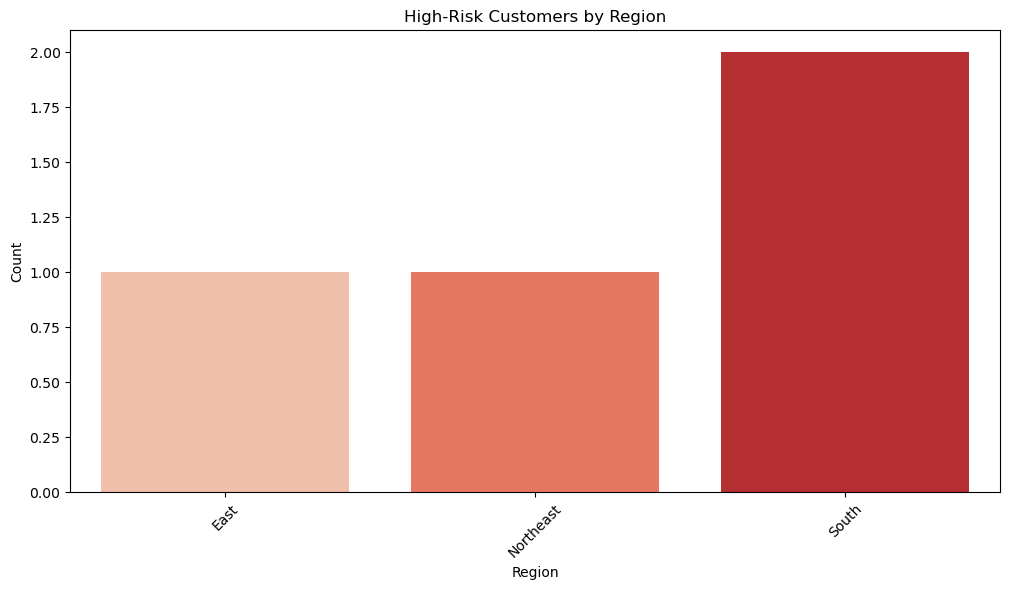

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3137390374.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_value_summary, x='Region', y='High_Value_Count', palette='Greens')


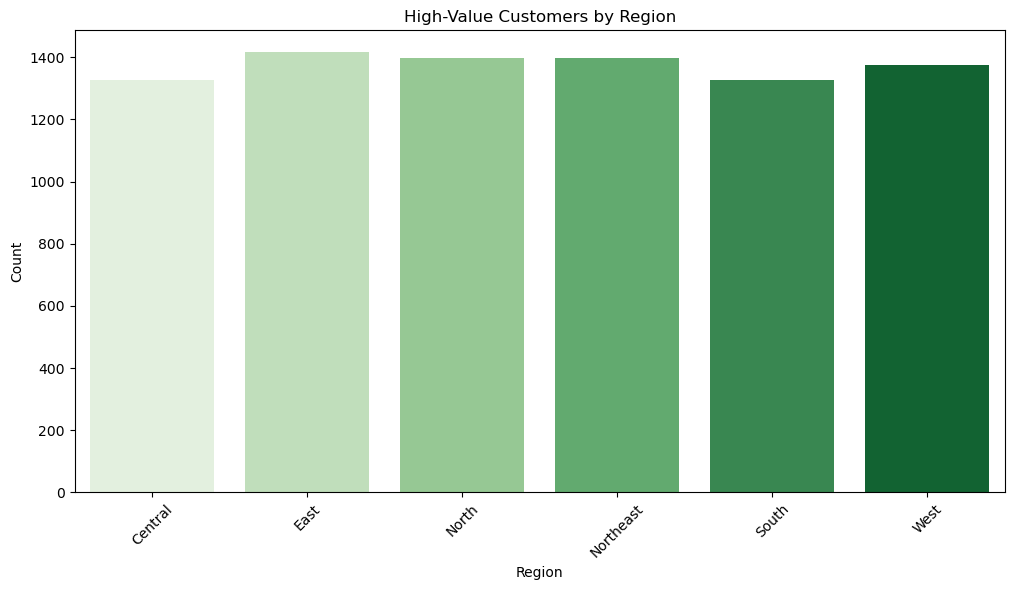

In [102]:
# Identify High-Risk Customers
high_risk_customers = customer_segments[
    (customer_segments['Income_Segment'] == 'Low') &
    (customer_segments['Credit_Score_Segment'] == 'Poor') &
    (customer_segments['Loan_Status'] == 'Defaulted')
]

# Identify High-Value Customers
high_value_customers = customer_segments[
    (customer_segments['Income_Segment'].isin(['High', 'Very High'])) &
    (customer_segments['Credit_Score_Segment'] == 'Excellent') &
    (customer_segments['Loan_Status'] == 'Active')
]

# Summary
high_risk_summary = high_risk_customers.groupby('Region').size().reset_index(name='High_Risk_Count')
high_value_summary = high_value_customers.groupby('Region').size().reset_index(name='High_Value_Count')

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=high_risk_summary, x='Region', y='High_Risk_Count', palette='Reds')
plt.title('High-Risk Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=high_value_summary, x='Region', y='High_Value_Count', palette='Greens')
plt.title('High-Value Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


5.3 Analyze Repayment Behavior Across Segments
Objective: Explore repayment patterns based on income, credit score, and loan status.

In [104]:
# Merge transactions with loan and customer data
transaction_analysis = transactions_df.merge(loans_df[['Loan_ID', 'Customer_ID']], on='Loan_ID')
transaction_analysis = transaction_analysis.merge(customers_df[['Customer_ID', 'Income_Segment', 'Credit_Score_Segment']], on='Customer_ID')

# Aggregate repayment behavior
repayment_behavior = transaction_analysis[transaction_analysis['Transaction_Type'] == 'EMI Payment'].groupby(
    ['Income_Segment', 'Credit_Score_Segment']
).agg({
    'Transaction_Amount': 'mean',  # Average EMI Payment
    'Loan_ID': 'count'  # Number of EMI Payments
}).reset_index().rename(columns={'Transaction_Amount': 'Avg_EMI_Amount', 'Loan_ID': 'Total_EMI_Count'})

# Visualization: Average EMI Payment by Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=repayment_behavior, x='Income_Segment', y='Avg_EMI_Amount', hue='Credit_Score_Segment', palette='Blues')
plt.title('Average EMI Payment by Income and Credit Score Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average EMI Payment')
plt.legend(title='Credit Score Segment')
plt.show()


KeyError: 'Customer_ID'

6. Advanced Statistical Analysis

6.1 Correlation Analysis for Default Risks
Objective: Analyze correlations among variables like Credit_Score, Loan_Amount, Interest_Rate, Overdue_Amount, and Default_Flag.

In [139]:
# Merge loans, defaults, and customers for correlation analysis
# default_risk_data = loans_df.merge(defaults_df[['Customer_ID','Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
default_risk_data = loans_df.merge(defaults_df[['Customer_ID','Loan_ID', 'Default_Amount']], on=['Customer_ID','Loan_ID'], how='left')
default_risk_data = default_risk_data.merge(customers_df[['Customer_ID','Credit_Score']], on='Customer_ID', how='left')
default_risk_data['Default_Flag'] = default_risk_data['Default_Amount'].notna().astype(int)

# Select relevant columns for correlation
default_risk_corr_data = default_risk_data[['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Default_Flag']].dropna()

# Correlation matrix
correlation_matrix = default_risk_corr_data.corr()

# Display correlation matrix
print(correlation_matrix)


               Credit_Score  Loan_Amount  Interest_Rate  Default_Flag
Credit_Score       1.000000     0.000139       0.002457           NaN
Loan_Amount        0.000139     1.000000      -0.003201           NaN
Interest_Rate      0.002457    -0.003201       1.000000           NaN
Default_Flag            NaN          NaN            NaN           NaN


6.2 Pairwise Correlation Heatmap
Objective: Visualize correlations among key variables: EMI_Amount, Recovery_Rate, and Default_Amount.

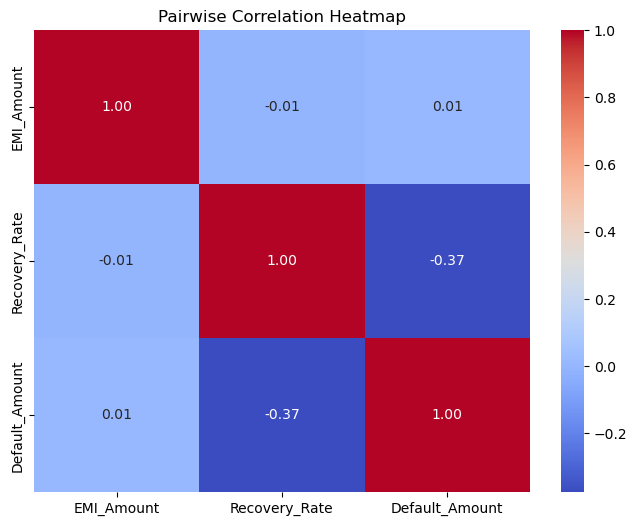

In [141]:
# Prepare data for heatmap
heatmap_data = defaults_df.merge(loans_df[['Loan_ID', 'EMI_Amount']], on='Loan_ID', how='left')
heatmap_data['Recovery_Rate'] = heatmap_data['Recovery_Amount'] / heatmap_data['Default_Amount']
heatmap_corr = heatmap_data[['EMI_Amount', 'Recovery_Rate', 'Default_Amount']].corr()

# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()


6.3 Branch-Level Correlation
Objective: Explore correlations between branch-level metrics such as Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate, and overall efficiency.

In [ ]:
# Calculate Recovery Rate for each branch: No matching/common field in branches_df to map with defaults_df

7. Transaction and Recovery Analysis

7.1 Penalty Payments and Overdue Trends
Objective: Analyze trends in penalty payments and overdue amounts to understand patterns and behaviors.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\283556804.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penalty_data['Transaction_Date'] = penalty_data['Transaction_Date'].dt.to_period('M')


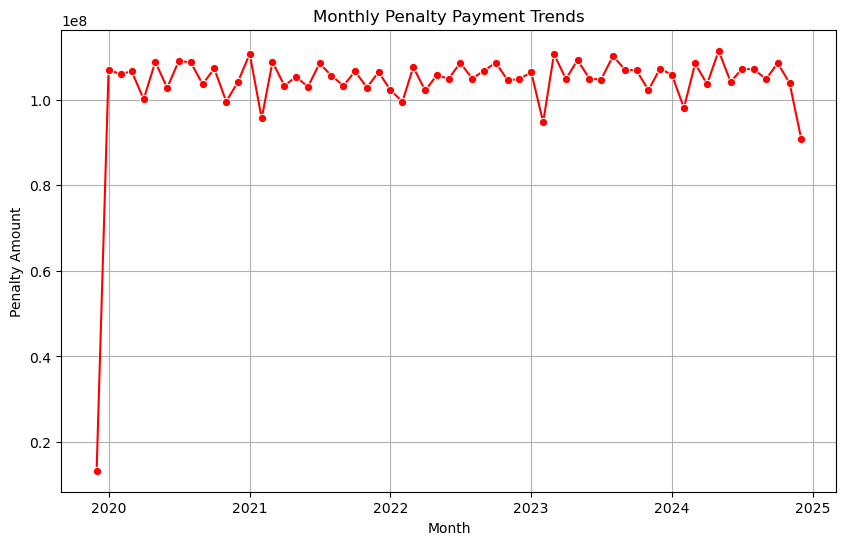

In [175]:
# Ensure Transaction_Date is in datetime format
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'], errors='coerce')

# Filter penalty payments from transactions
penalty_data = transactions_df[transactions_df['Payment_Type'] == 'Penalty']

# Aggregate penalty amounts by month
penalty_data['Transaction_Date'] = penalty_data['Transaction_Date'].dt.to_period('M')
penalty_trends = penalty_data.groupby('Transaction_Date')['Amount'].sum().reset_index()
penalty_trends['Transaction_Date'] = penalty_trends['Transaction_Date'].dt.to_timestamp()

# Visualize penalty trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Transaction_Date', y='Amount', data=penalty_trends, marker='o', color='red')
plt.title('Monthly Penalty Payment Trends')
plt.xlabel('Month')
plt.ylabel('Penalty Amount')
plt.grid(True)
plt.show()


7.2 Recovery Rates by Default Reason and Legal Action
Objective: Evaluate recovery rates based on Default_Reason and whether legal actions were taken.

In [155]:
# Calculate recovery rate by Default_Reason
recovery_by_reason = defaults_df.groupby('Default_Reason').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()
recovery_by_reason['Recovery_Rate'] = recovery_by_reason['Total_Recovery_Amount'] / recovery_by_reason['Total_Default_Amount']

# Recovery rate based on Legal_Action
recovery_by_legal = defaults_df.groupby('Legal_Action').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()
recovery_by_legal['Recovery_Rate'] = recovery_by_legal['Total_Recovery_Amount'] / recovery_by_legal['Total_Default_Amount']

# Display recovery data
print("Recovery by Default Reason:")
print(recovery_by_reason)
print("\nRecovery by Legal Action:")
print(recovery_by_legal)


Recovery by Default Reason:
      Default_Reason  Total_Default_Amount  Total_Recovery_Amount  \
0   Business Failure             121925983               29818593   
1           Job Loss             113477409               26835222   
2  Medical Emergency             119083296               30263160   
3              Other             122321069               29002838   

   Recovery_Rate  
0       0.244563  
1       0.236481  
2       0.254134  
3       0.237104  

Recovery by Legal Action:
  Legal_Action  Total_Default_Amount  Total_Recovery_Amount  Recovery_Rate
0           No             242087969               58458449       0.241476
1          Yes             234719788               57461364       0.244808


7.3 Recovery Rates Across Regions and Branches
Objective: Compare recovery performance across regions and branches.

In [ ]:
No matching/common field in branches_df

8. EMI Analysis
Analyze the relationship between EMI amounts and default probabilities.
Identify thresholds for EMI amounts where defaults are most likely.
Compare EMI trends across loan types.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2525223832.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_prob = emi_defaults_data.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2525223832.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EMI_Bin', y='Default_Flag', data=emi_default_prob, palette='viridis')


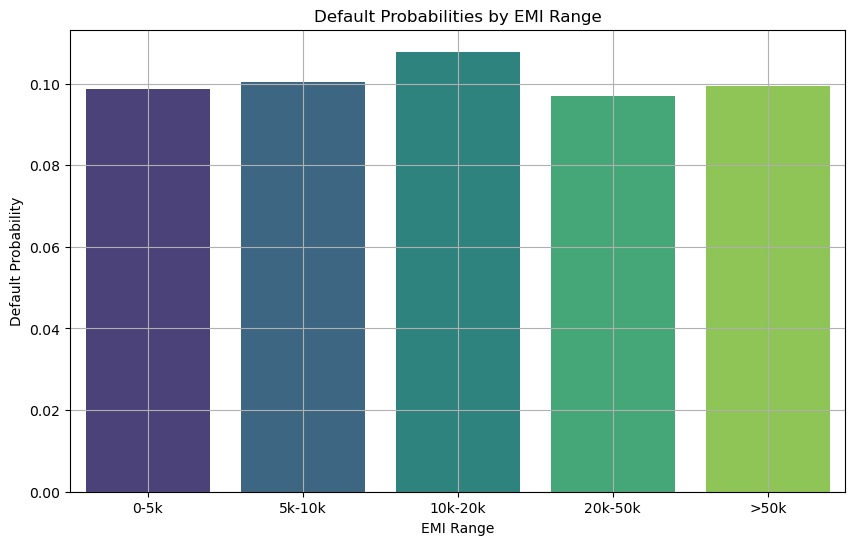

KeyError: 'Loan_Type'

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merge loans and defaults datasets
emi_defaults_data = loans_df.merge(defaults_df, on='Loan_ID', how='left')

# Fill NaN in Default_Amount (indicating no default) with 0
emi_defaults_data['Default_Flag'] = np.where(emi_defaults_data['Default_Amount'].notna(), 1, 0)

# Calculate EMI Amount
emi_defaults_data['EMI_Amount'] = (
    emi_defaults_data['Loan_Amount'] * emi_defaults_data['Interest_Rate'] / 1200
) / (1 - (1 + emi_defaults_data['Interest_Rate'] / 1200) ** -emi_defaults_data['Loan_Term'])

# Bin EMI amounts into ranges
emi_bins = pd.cut(emi_defaults_data['EMI_Amount'], bins=[0, 5000, 10000, 20000, 50000, np.inf], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '>50k'])
emi_defaults_data['EMI_Bin'] = emi_bins

# Calculate default probabilities for each EMI range
emi_default_prob = emi_defaults_data.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()

# Plot default probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x='EMI_Bin', y='Default_Flag', data=emi_default_prob, palette='viridis')
plt.title('Default Probabilities by EMI Range')
plt.xlabel('EMI Range')
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

# Analyze EMI trends by Loan Type
emi_loan_type = emi_defaults_data.groupby(['Loan_Type', 'EMI_Bin'])['Default_Flag'].mean().reset_index()

# Visualize EMI trends across Loan Types
plt.figure(figsize=(12, 6))
sns.barplot(x='EMI_Bin', y='Default_Flag', hue='Loan_Type', data=emi_loan_type, palette='coolwarm')
plt.title('Default Probabilities by EMI Range and Loan Type')
plt.xlabel('EMI Range')
plt.ylabel('Default Probability')
plt.legend(title='Loan Type')
plt.grid(True)
plt.show()


Approval and Rejection Rates:
Approval_Status
Approved    84.745763
Rejected    15.254237
Name: count, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rejection_counts.index, y=approval_rejection_rates, palette="viridis")


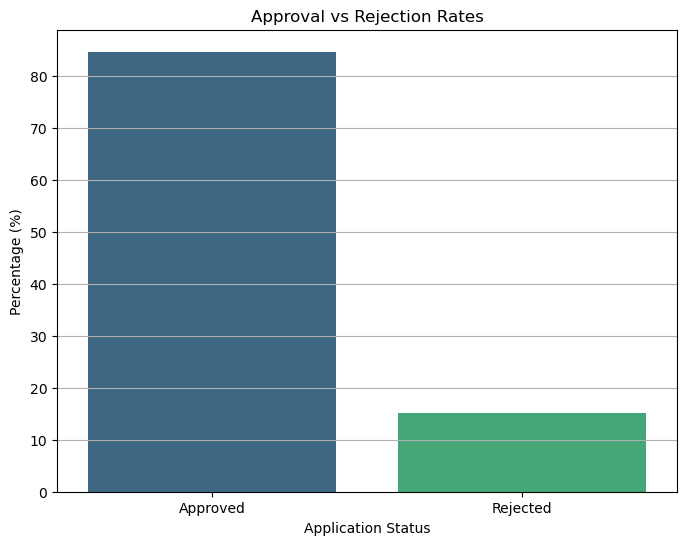

Most Common Rejection Reasons:
Rejection_Reason
Low Credit Score        4297
Incomplete Documents    4204
Insufficient Income     4099
Name: count, dtype: int64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rejection_reasons.index, y=rejection_reasons.values, palette="coolwarm")


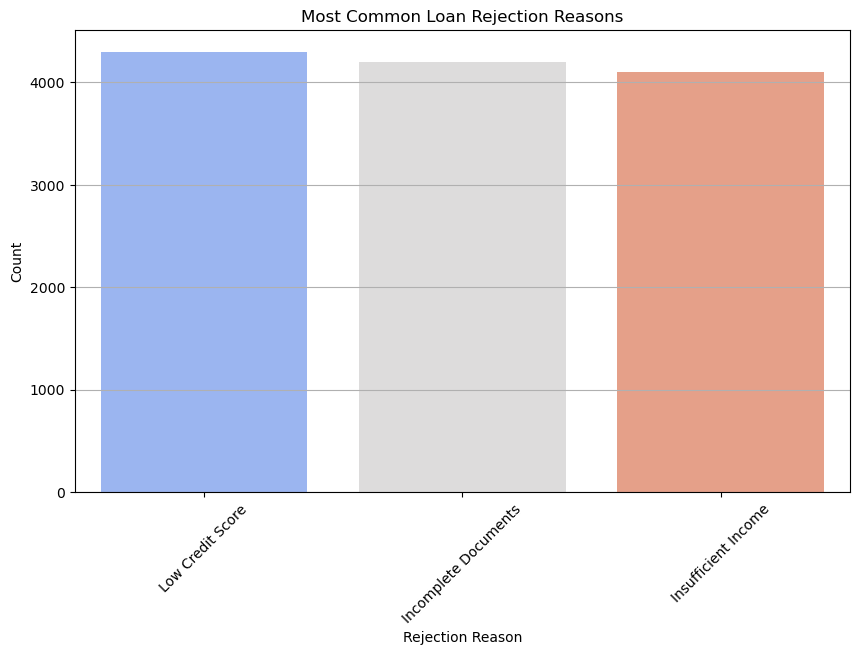

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approval_Status', y='Processing_Fee', data=applications_df, palette="Set2")


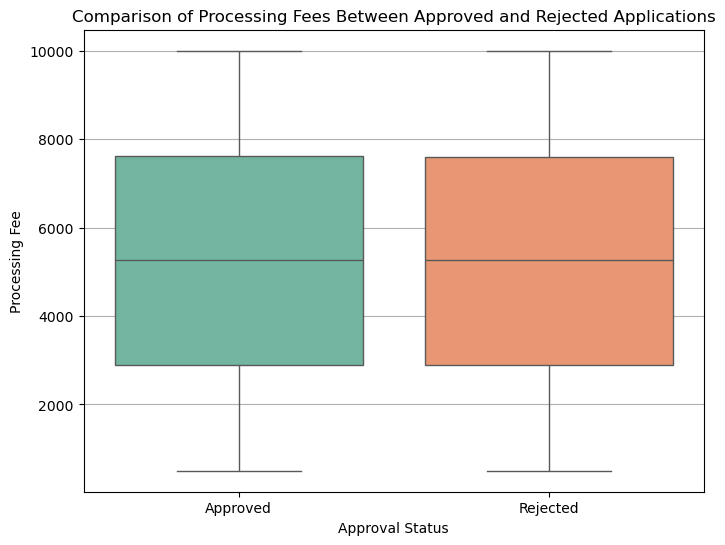

Processing Fee Statistics - Approved Applications:
count    70000.000000
mean      5252.395014
std       2741.573413
min        500.000000
25%       2895.000000
50%       5256.000000
75%       7626.000000
max      10000.000000
Name: Processing_Fee, dtype: float64

Processing Fee Statistics - Rejected Applications:
count    12600.000000
mean      5255.141587
std       2721.010522
min        500.000000
25%       2897.500000
50%       5271.000000
75%       7602.000000
max       9998.000000
Name: Processing_Fee, dtype: float64


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate approval and rejection rates
approval_rejection_counts = applications_df['Approval_Status'].value_counts()
approval_rejection_rates = approval_rejection_counts / len(applications_df) * 100

print("Approval and Rejection Rates:")
print(approval_rejection_rates)

# Plot approval and rejection rates
plt.figure(figsize=(8, 6))
sns.barplot(x=approval_rejection_counts.index, y=approval_rejection_rates, palette="viridis")
plt.title("Approval vs Rejection Rates")
plt.xlabel("Application Status")
plt.ylabel("Percentage (%)")
plt.grid(axis='y')
plt.show()

# 2. Identify the most common reasons for loan rejection
rejection_reasons = applications_df[applications_df['Approval_Status'] == 'Rejected']['Rejection_Reason'].value_counts()

print("Most Common Rejection Reasons:")
print(rejection_reasons)

# Plot rejection reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=rejection_reasons.index, y=rejection_reasons.values, palette="coolwarm")
plt.title("Most Common Loan Rejection Reasons")
plt.xlabel("Rejection Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Compare processing fees between approved and rejected applications
approved_apps = applications_df[applications_df['Approval_Status'] == 'Approved']
rejected_apps = applications_df[applications_df['Approval_Status'] == 'Rejected']

# Boxplot comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approval_Status', y='Processing_Fee', data=applications_df, palette="Set2")
plt.title("Comparison of Processing Fees Between Approved and Rejected Applications")
plt.xlabel("Approval Status")
plt.ylabel("Processing Fee")
plt.grid(axis='y')
plt.show()

# Print summary statistics for processing fees
approved_fees = approved_apps['Processing_Fee'].describe()
rejected_fees = rejected_apps['Processing_Fee'].describe()

print("Processing Fee Statistics - Approved Applications:")
print(approved_fees)
print("\nProcessing Fee Statistics - Rejected Applications:")
print(rejected_fees)
